# Setup

In [1]:
import warnings
import os
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

warnings.filterwarnings('ignore')

In [2]:
ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, 'data')

In [3]:
# Get image online
def get_img(url, name, path=DATA_PATH):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    save_path = img.save(os.path.join(path, name))
    
get_img('https://p3.pstatp.com/large/2c350002f2d0a5dd8eb1', 
        'pushu.jpg')
get_img('https://www.csudh.edu/Assets/csudh-sites/social-work/images/facebook-thumbsup.png', 'thumbup.png')

# Load and check image

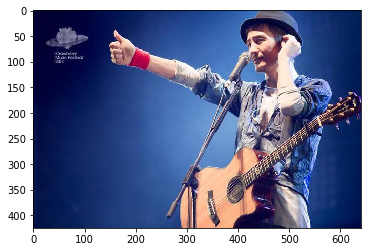

In [4]:
TEST_IMAGE = os.path.join(DATA_PATH, 'pushu.jpg')

img = Image.open(TEST_IMAGE)
img.save(os.path.join(DATA_PATH, 'new_img.png'))
plt.imshow(img)
plt.show()

# Resize

Original size (640, 425)
New size (400, 400)


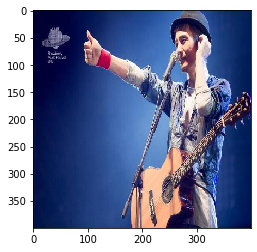

In [5]:
# Resize the image
img = Image.open(TEST_IMAGE)
new_img = img.resize((400, 400))

print('Original size', img.size)
print('New size', new_img.size)

plt.imshow(new_img)
plt.show()

# Thumbnail

**Note:** Thumbnail will change the image in place. If you don't want to change the image, you show perform the operation on a copy of the original image. (image.copy())

New image size:  (400, 265)


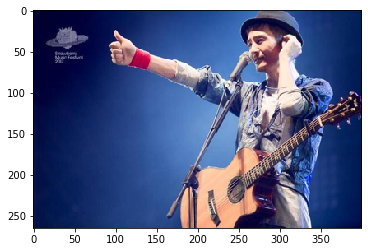

In [6]:
# Thumpnail, resize the image and keep the hight-width ratio
img = Image.open(TEST_IMAGE).copy()
img.thumbnail((400, 400))

print('New image size: ', img.size)
plt.imshow(img)
plt.show()

# Crop

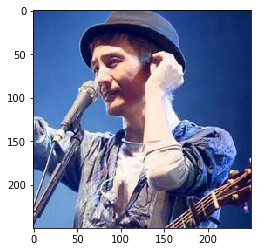

In [7]:
# Cropping
# Load image
img = Image.open(TEST_IMAGE)

# Define the bounding box to crop
x1 = 350; y1 = 0
x2 = 600; y2 = 250
bbox = (x1, y1, x2, y2)

cropped_img = img.crop(bbox)
plt.imshow(cropped_img)
plt.show()

# Paste

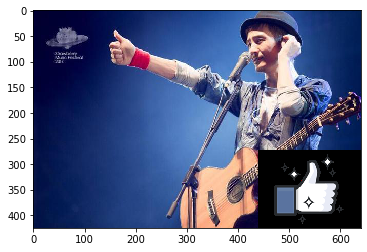

In [8]:
# Paste one image on to another
img = Image.open(TEST_IMAGE)
logo = Image.open(os.path.join(DATA_PATH, 'thumbup.png'))

# Resize logo
logo.thumbnail((200, 200))
img_copy = img.copy()
position = ((img_copy.width - logo.width), (img_copy.height - logo.height))
# Paste
img_copy.paste(logo, position)
plt.imshow(img_copy)
plt.show()

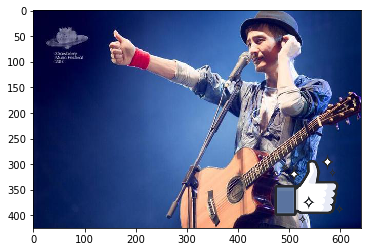

In [9]:
# Use mask to avoid background of image
# Paste one image on to another
img = Image.open(TEST_IMAGE)
logo = Image.open(os.path.join(DATA_PATH, 'thumbup.png'))

# Resize logo
logo.thumbnail((200, 200))
img_copy = img.copy()
position = ((img_copy.width - logo.width), (img_copy.height - logo.height))
# Paste
img_copy.paste(logo, position, logo)
plt.imshow(img_copy)
plt.show()

# Rotation

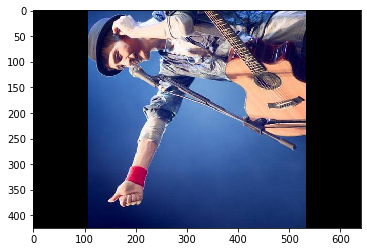

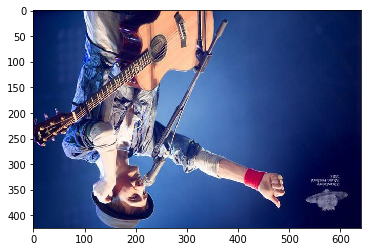

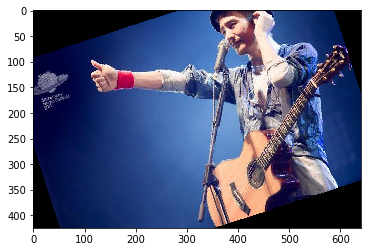

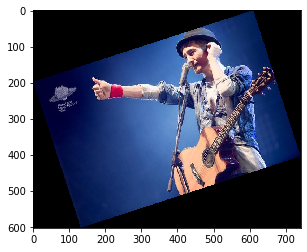

In [10]:
img = Image.open(TEST_IMAGE)
img_rot_90 = img.rotate(90)
plt.imshow(img_rot_90)
plt.show()

img_rot_180 = img.rotate(180)
plt.imshow(img_rot_180)
plt.show()

img_rot_18 = img.rotate(18)
plt.imshow(img_rot_18)
plt.show()

img_rot_18 = img.rotate(18, expand=True)
plt.imshow(img_rot_18)
plt.show()


# Flipping

Available method of Image.transpose(method):
- PIL.Image.FLIP_LEFT_RIGHT
- PIL.Image.FLIP_TOP_BOTTOM
- PIL.Image.ROTATE_90
- PIL.Image.ROTATE_180
- PIL.Image.ROTATE_270
- PIL.Image.TRANSPOSE

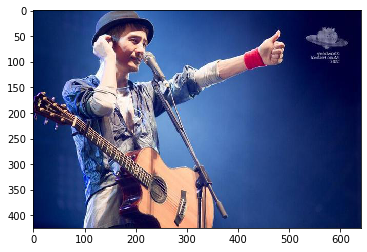

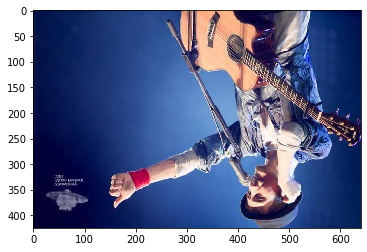

In [11]:
img = Image.open(TEST_IMAGE)
img_flip = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(img_flip)
plt.show()

img_flip = img.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(img_flip)
plt.show()

# Plot on the image

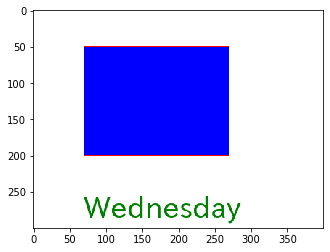

In [12]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank image with white background
blank_img = Image.new('RGBA', (400, 300), 'white')

img_draw = ImageDraw.Draw(blank_img)
img_draw.rectangle((70, 50, 270, 200), outline='red', fill='blue')

fnt = ImageFont.truetype('TakaoPGothic.ttf',40)
img_draw.text((70, 250), 'Wednesday', font=fnt, fill='green')

plt.imshow(blank_img)
plt.show()

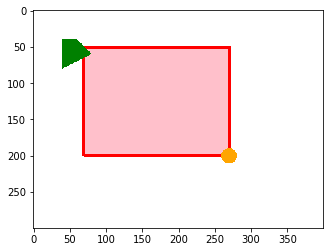

In [13]:
from PIL import Image, ImageFont, ImageDraw

blank_img = Image.new('RGBA', (400, 300), 'white')
img_draw = ImageDraw.Draw(blank_img)

# Plot rectangle
img_draw.rectangle((70, 50, 270, 200), outline=None, fill='pink')
img_draw.line([(70,50),(270,50),(270,200),(70,200),(70,50)], fill='red', width=4)

# Plot circle
r = 10  # radius
img_draw.ellipse((270-r, 200-r, 270+r, 200+r), fill='orange')  # centered at (270, 200)

# Plot a polygon
img_draw.polygon([(40, 40), (40, 80), (80, 60), (60, 40)], fill='green', outline=None)
plt.imshow(blank_img)
plt.show()

# Change image color

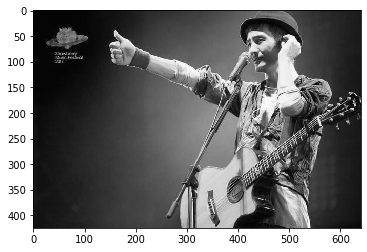

In [14]:
img = Image.open(TEST_IMAGE)

# Convert to greyscale
greyscale_img = img.convert('L')

# Specify cmap='gray' to show the image
plt.imshow(greyscale_img, cmap='gray')
plt.show()